# K-Means

In [2]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [4]:
# Load the data
data = pd.read_csv('iris.csv')
data.head(2) # Setosa, Virginica and Versicolour

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [5]:
# Basic checks
data.shape

(150, 5)

In [6]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [8]:
Counter(data.target) # 0=Setosa #1=Versicolor and 2=Virginica

Counter({0: 50, 1: 50, 2: 50})

In [12]:
X = data.iloc[:,:4]
X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [17]:
model = KMeans(n_clusters = 3, random_state = 2)
model.fit(X)
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [18]:
accuracy_score(data.target,model.labels_)

0.8933333333333333

In [19]:
confusion_matrix(data.target,model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

In [20]:
pd.crosstab(data.target,model.labels_)

col_0,0,1,2
target,,,
0,50,0,0
1,0,48,2
2,0,14,36


# Visualization

In [21]:
y = pd.DataFrame(data.target)
y.head(2)

,target
0,0
1,0


Text(0.5, 1.0, 'This is actual dataset')

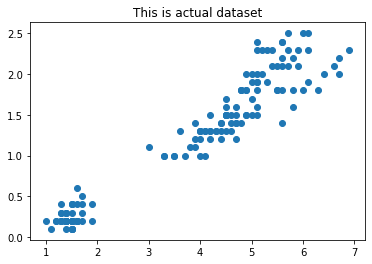

In [24]:
plt.scatter(x = data.petal_length, y = data.petal_width)
plt.title("This is actual dataset")

Text(0.5, 1.0, 'This is actual dataset')

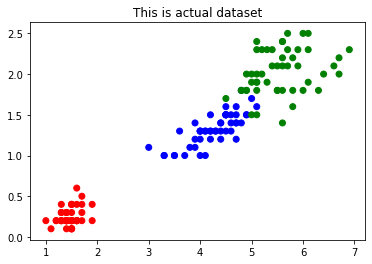

In [26]:
color = np.array(['red','blue','green'])
plt.scatter(x = data.petal_length, y = data.petal_width,c = color[data.target])
plt.title("This is actual dataset")

Text(0.5, 1.0, 'Predicted')

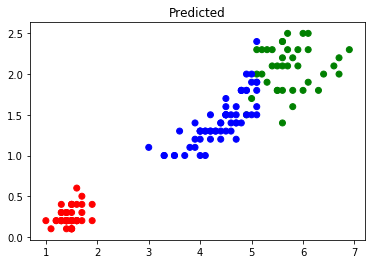

In [28]:
plt.scatter(x = data.petal_length, y = data.petal_width,c = color[model.labels_])
plt.title("Predicted")

# Elbow Technique
- To find the number of clusters hidden in data or to find KMeans
- K = 1 to 17, we calculate distortion and then plot grahp K and distortion
- Distortion - Avg distance of the points to the centroid
- d decreases as the number of clusters increases

In [29]:
data = pd.read_csv('iris.csv')
data.head(2)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [30]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [45]:
X = data.iloc[:,[2,3]]
X.head(2)

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2


In [42]:
# To determine K value
distortions = []
K = range(1,17)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'),axis = 1)) / X.shape[0])

In [43]:
distortions

[1.7069324035460887,
 0.5843925063315167,
 0.3692571031973975,
 0.2997148916349945,
 0.2655741264274258,
 0.23406659882774244,
 0.21339011448164114,
 0.19577258944446915,
 0.1849727404735755,
 0.17266626410448963,
 0.1647291087934394,
 0.15748995018767975,
 0.14912797939221087,
 0.1434336296396892,
 0.13881547685929238,
 0.13443690976512035]

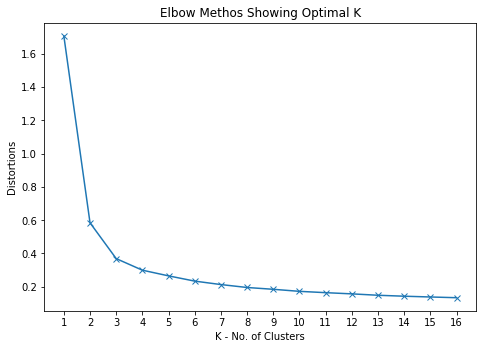

In [44]:
# plot the elbow
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(range(1,25))
ax.set_xlabel('K - No. of Clusters')
ax.set_ylabel('Distortions')
ax.set_title('Elbow Methos Showing Optimal K')
ax.plot(K, distortions, marker = 'x')
plt.show()